In [4]:
#!pip install seaborn

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Implementing KMeans class

In [6]:
class KMeans:
    
    def __init__(self ,k = 8, max_iter = 100 ):
        self.k = k
        self.max_iter = max_iter
        print("Initalized k with :",k)
    
    def euclidDistance(self , x1, x2):
        return (np.sqrt(np.sum(np.square(x1 - x2) , axis = 1)))
    
    def fit(self, data):
        self.centroids = []
        
        #initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
        for i in range(self.k):
            self.centroids.append(data.iloc[i].to_numpy())
            
        for itr in range(self.max_iter):
            self.classes = {}
            for cluster in range(self.k):
                self.classes[cluster] = []

            #find the distance between the point and cluster; choose the nearest centroid
            for point in range(len(data)):
                distances = self.euclidDistance(self.centroids, data.iloc[point].to_numpy())
                classification = np.argmin(distances)
                self.classes[classification].append(data.iloc[point])

            previous = np.array(self.centroids)
            #average the cluster datapoints to re-calculate the centroids
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)
            
            optimal = True
            curr = np.array(self.centroids)
            
            #difference in the cluster centers of two consecutive iterations to declare convergence.
            if np.sum((curr - previous)/previous * 100.0) > 0.0001:
                optimal = False

            
            #break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
            if optimal:
                    break
    

## Preparing Data

In [7]:
file = './iris.csv'

In [8]:
data = pd.read_csv(file)

In [9]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Extracting features and visualizing data

In [10]:
X = data.iloc[:,:-1]

C:\Users\Zebfred\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

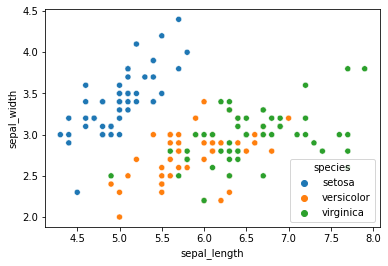

In [11]:
sb.scatterplot(X.iloc[:,0] , X.iloc[:,1] , hue = data.iloc[:,-1])

## Using K-Means classifer

In [12]:
clf = KMeans(3)

Initalized k with : 3


In [13]:
clf.fit(X)

In [14]:
colors = ["r", "g", "c", "b", "k"]

## Visualizing classifier centroids

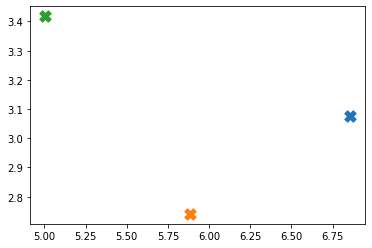

In [15]:
for centroid in clf.centroids:
    plt.scatter(centroid[0] , centroid[1] , s = 130, marker = "X")

## Visualizing classifier centroids with data points

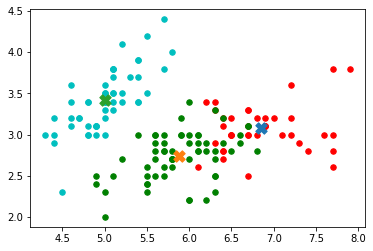

In [16]:
for classification in clf.classes:
    color = colors[classification]
    for features in clf.classes[classification]:
        plt.scatter(features[0], features[1], color = color,s = 30)

for centroid in clf.centroids:
    plt.scatter(centroid[0] , centroid[1] , s = 130, marker = "X")

**Note :** For plot 1, the scales of the axis range from (4.75,2.7) to (7,3.5). Whereas, the scales for the plot 2 range from (4.0,1.75) to (8.25, 4.55).